In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from  shutil import copyfile
import random
import zipfile

In [3]:
try:
    shutil.rmtree('C:\\Data\\CV\\dogs-vs-cats\\')
except:
    print("Directory Does not exists")

In [4]:
# This code block unzips the full Cats-v-Dogs dataset to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
path_cats_and_dogs ='C:\\Data\\CV\\dogs-vs-cats.zip'


local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:\\Data\\CV\\dogs-vs-cats\\')
zip_ref.close()

In [5]:
test_path_cats_and_dogs ='C:\\Data\\CV\\dogs-vs-cats\\test1.zip'


local_zip = test_path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:\\Data\\CV\\dogs-vs-cats\\')
zip_ref.close()

In [6]:
train_path_cats_and_dogs ='C:\\Data\\CV\\dogs-vs-cats\\train.zip'


local_zip = train_path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:\\Data\\CV\\dogs-vs-cats\\')
zip_ref.close()

In [7]:
BASE_PATH = 'C:\\Data\\CV\\dogs-vs-cats\\train\\'
TRAIN_PATH='C:\\Data\\CV\\dogs-vs-cats\\train_data\\'
VAL_PATH='C:\\Data\\CV\\dogs-vs-cats\\validation_data\\'

In [8]:

try:
    shutil.rmtree(TRAIN_PATH)
    shutil.rmtree(VAL_PATH)
except:
    print("Directory does not exists")

Directory does not exists


In [9]:
os.mkdir(TRAIN_PATH)
os.mkdir(VAL_PATH)
train_dog=os.path.join(TRAIN_PATH , 'dog')
train_cat=os.path.join(TRAIN_PATH , 'cat')
val_dog=os.path.join(VAL_PATH , 'dog')
val_cat=os.path.join(VAL_PATH , 'cat')
print(train_cat)
os.mkdir(train_dog)
os.mkdir(train_cat)
os.mkdir(val_dog)
os.mkdir(val_cat)

C:\Data\CV\dogs-vs-cats\train_data\cat


In [10]:
#segregating cats and dog files for training and validation
cat_file_list=[]
dog_file_list=[]
for file in os.listdir(BASE_PATH):
    if file[:3]=='cat':
        cat_file_list.append(file)
    elif file[:3]=='dog':
        dog_file_list.append(file)
#shuffling the list


In [11]:
train_split=0.8

random.sample(cat_file_list, len(cat_file_list))
random.sample(dog_file_list, len(dog_file_list))
num_of_training_files_cat= int(len(cat_file_list)* train_split)
num_of_training_files_dog= int(len(dog_file_list)* train_split)
print("Total training cat files", num_of_training_files_cat)
print("Training files dog", num_of_training_files_dog)
print("Total filess", len(cat_file_list) + len(dog_file_list) )
print("Total val Dog files", len(dog_file_list) - num_of_training_files_dog)

for file in cat_file_list[:num_of_training_files_cat]:
   copyfile(os.path.join(BASE_PATH, file), os.path.join(train_cat, file))
   
for file in cat_file_list[num_of_training_files_cat:]:
   copyfile(os.path.join(BASE_PATH, file), os.path.join(val_cat, file))

for file in dog_file_list[:num_of_training_files_dog]:
   copyfile(os.path.join(BASE_PATH, file), os.path.join(train_dog, file))
   
for file in dog_file_list[num_of_training_files_dog:]:
   copyfile(os.path.join(BASE_PATH, file), os.path.join(val_dog, file))
    
    

Total training cat files 10000
Training files dog 10000
Total filess 25000
Total val Dog files 2500


In [12]:
print("Total val Dog files", len(dog_file_list) - num_of_training_files_dog)

Total val Dog files 2500


In [13]:
batch_size = 64 #128
epochs = 75
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [14]:
train_image_generator = ImageDataGenerator(
                                                rescale=1./255,
                                                rotation_range=45,
                                                width_shift_range=.15,
                                                height_shift_range=.15,
                                                horizontal_flip=True,
                                                zoom_range=0.3                         

                                            ) # Generator for our training data

In [15]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [16]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=TRAIN_PATH,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=VAL_PATH,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [17]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

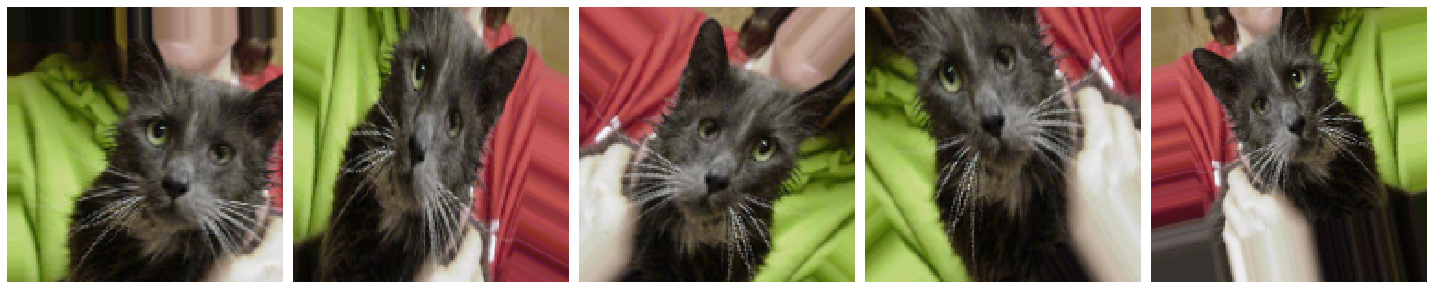

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
sample_training_images, _ = next(train_data_gen)

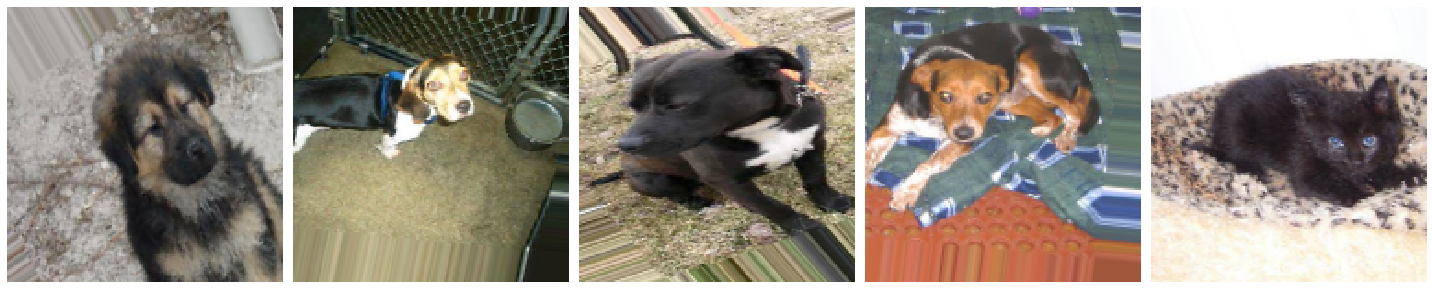

In [20]:
plotImages(sample_training_images[:5])

In [21]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



Instructions for updating:
Use tf.cast instead.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
__________

In [24]:

batch_size=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=1000,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1000
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
313/313 [==============================] - 112s 356ms/step - loss: 0.6968 - acc: 0.5224 - val_loss: 0.6278 - val_acc: 0.6658
Epoch 2/75
313/313 [==============================] - 112s 357ms/step - loss: 0.6242 - acc: 0.6283 - val_loss: 0.5634 - val_acc: 0.6712
Epoch 3/75
313/313 [==============================] - 112s 359ms/step - loss: 0.5915 - acc: 0.6554 - val_loss: 0.5379 - val_acc: 0.6944
Epoch 4/75
313/313 [==============================] - 111s 356ms/step - loss: 0.5588 - acc: 0.6863 - val_loss: 0.5036 - val_acc: 0.7288
Epoch 5/75
313/313 [==============================] - 112s 357ms/step - loss: 0.5413 - acc: 0.7049 - val_loss: 0.4851 - val_acc: 0.7414
Epoch 6/75
313/313 [==============================] - 110s 353ms/step - loss: 0.5289 - acc: 0.7121 - val_loss: 0.5024 - val_acc: 0.6964
Epoch 7/75
313/313 [==============================] - 112s 357ms/step - loss: 0.5103 - acc: 0.7333 - val_loss: 0.4870 - val_acc: 0.7606


Epoch 37/75
313/313 [==============================] - 110s 353ms/step - loss: 0.3390 - acc: 0.8413 - val_loss: 0.2824 - val_acc: 0.8808
Epoch 38/75
313/313 [==============================] - 112s 358ms/step - loss: 0.3353 - acc: 0.8432 - val_loss: 0.2713 - val_acc: 0.8686
Epoch 39/75
313/313 [==============================] - 112s 359ms/step - loss: 0.3316 - acc: 0.8452 - val_loss: 0.2683 - val_acc: 0.8724
Epoch 40/75
313/313 [==============================] - 111s 355ms/step - loss: 0.3333 - acc: 0.8439 - val_loss: 0.2820 - val_acc: 0.8622
Epoch 41/75
313/313 [==============================] - 113s 361ms/step - loss: 0.3311 - acc: 0.8468 - val_loss: 0.2947 - val_acc: 0.8820
Epoch 42/75
313/313 [==============================] - 113s 360ms/step - loss: 0.3279 - acc: 0.8460 - val_loss: 0.2688 - val_acc: 0.8794
Epoch 43/75
313/313 [==============================] - 111s 355ms/step - loss: 0.3214 - acc: 0.8514 - val_loss: 0.2620 - val_acc: 0.8908
Epoch 44/75
313/313 [====================

Epoch 74/75
313/313 [==============================] - 110s 352ms/step - loss: 0.2779 - acc: 0.8752 - val_loss: 0.2143 - val_acc: 0.9170
Epoch 75/75
313/313 [==============================] - 111s 354ms/step - loss: 0.2764 - acc: 0.8719 - val_loss: 0.2548 - val_acc: 0.9066


In [25]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

In [26]:
img_path='C:\\Data\\CV\\dogs-vs-cats\\test1\\126.jpg' #dog

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0
y_pred=model.predict(x)
#_pred =(y_pred>0.5)
print(y_pred)

[[1.2968054]]


In [27]:
train_data_gen.class_indices

{'cat': 0, 'dog': 1}

In [39]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


conv2d (3, 3, 3, 16)
16


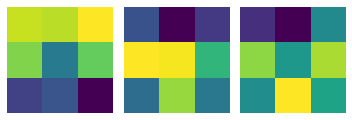

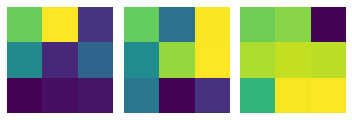

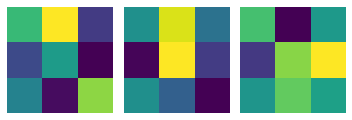

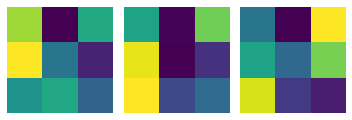

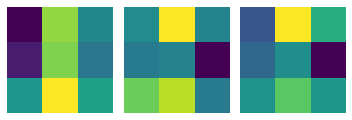

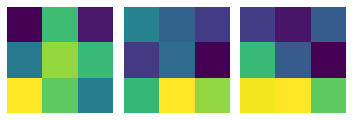

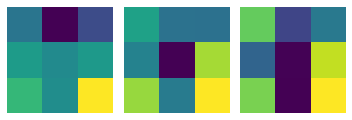

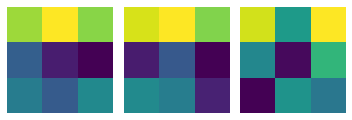

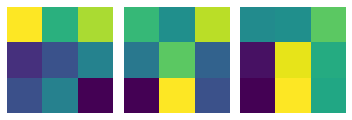

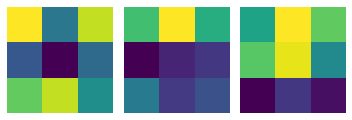

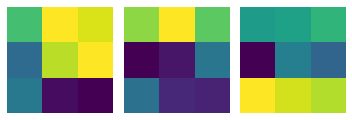

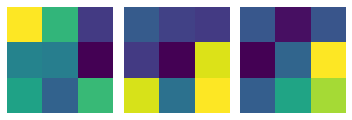

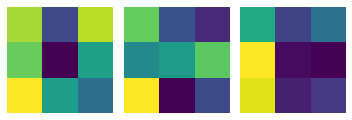

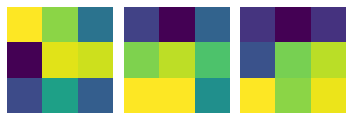

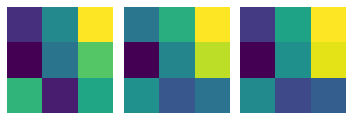

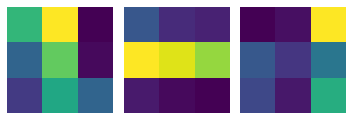

conv2d_1 (3, 3, 16, 32)
32


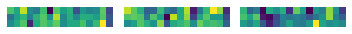

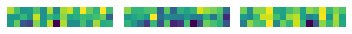

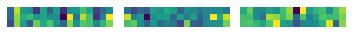

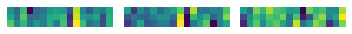

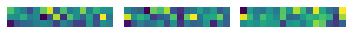

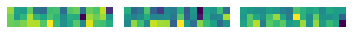

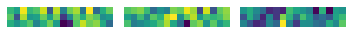

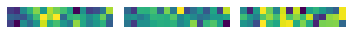

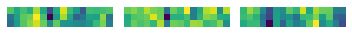

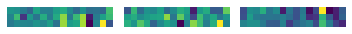

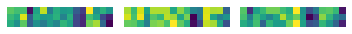

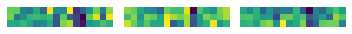

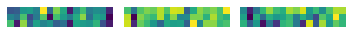

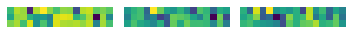

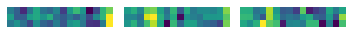

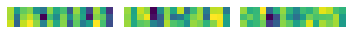

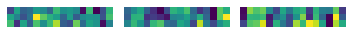

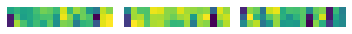

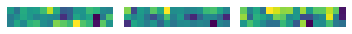

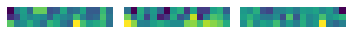

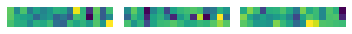

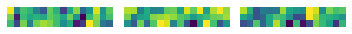

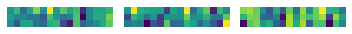

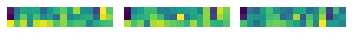

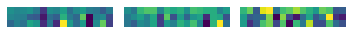

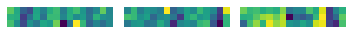

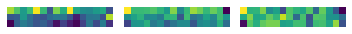

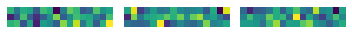

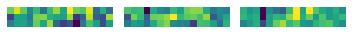

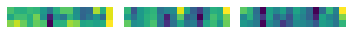

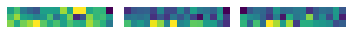

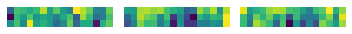

conv2d_2 (3, 3, 32, 64)
64


In [40]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

conv2d (3, 3, 3, 16)
16


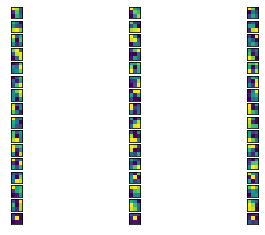

conv2d_1 (3, 3, 16, 32)
32


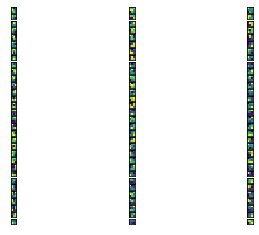

conv2d_2 (3, 3, 32, 64)
64


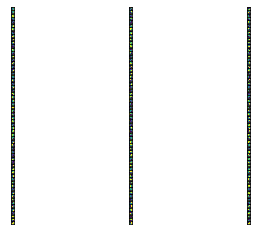

In [42]:
#Visualizing the filters
#plt.figure(figsize=(5,5))
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, weights.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(weights.shape[3])
        filter_cnt=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting ecah channel
            for j in range(filters.shape[0]):
                #plt.figure( figsize=(5, 5) )
                #f = plt.figure(figsize=(10,10))
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()
        

In [47]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

(1, 75, 75, 16)
(1, 75, 75, 16)
(1, 75, 75, 32)
(1, 37, 37, 32)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 64)
(1, 20736)
(1, 512)
(1, 1)


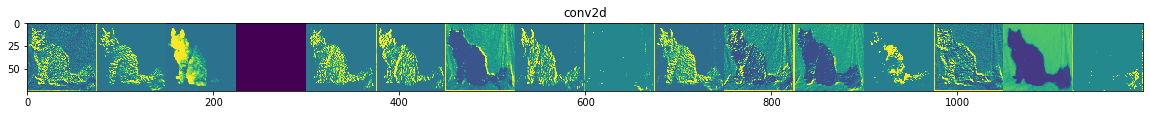

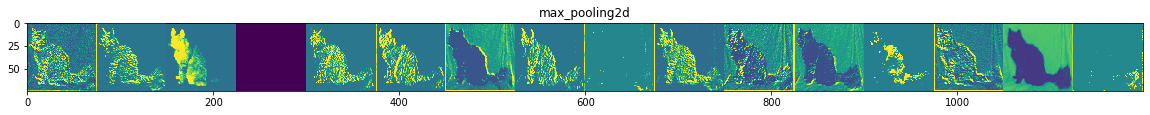

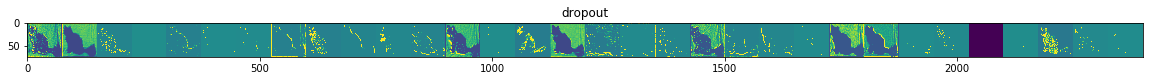

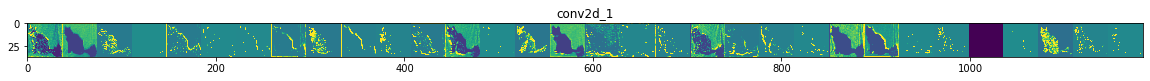

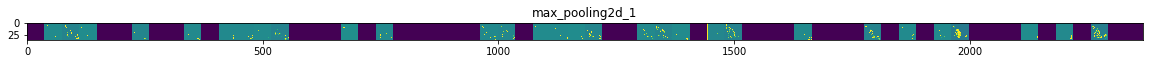

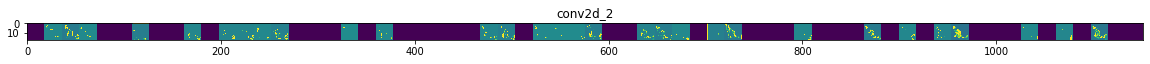

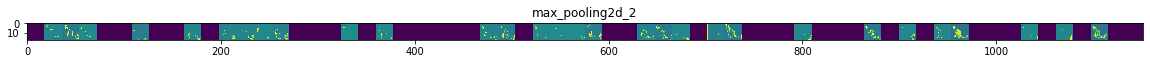

In [48]:

img_path='C:\\Data\\CV\\dogs-vs-cats\\test1\\136.jpg' #dog
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
#cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
#dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

#img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

(1, 75, 75, 16)
(1, 75, 75, 16)
(1, 75, 75, 32)
(1, 37, 37, 32)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 64)
(1, 20736)
(1, 512)
(1, 1)


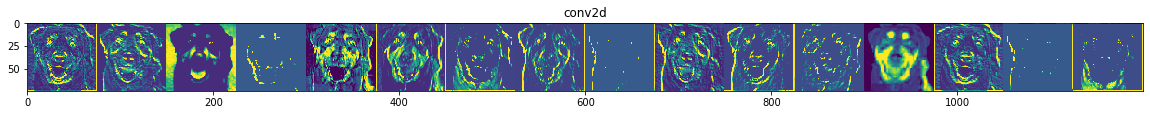

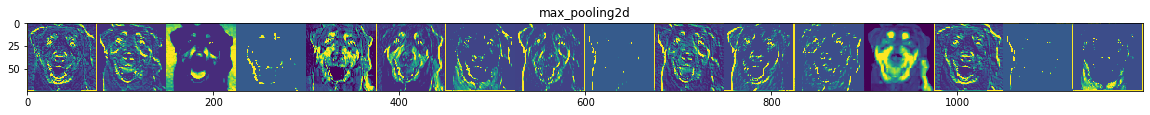

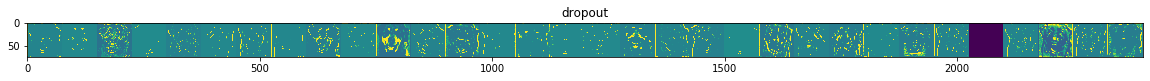

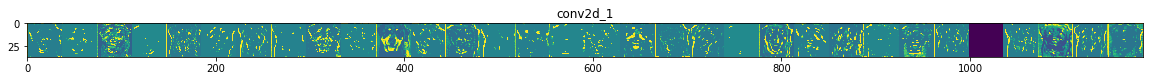

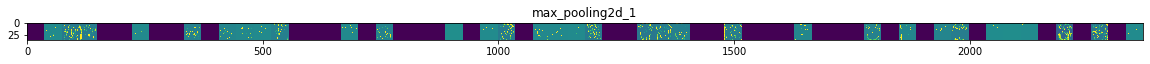

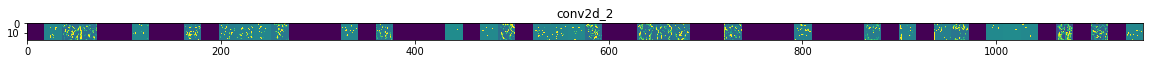

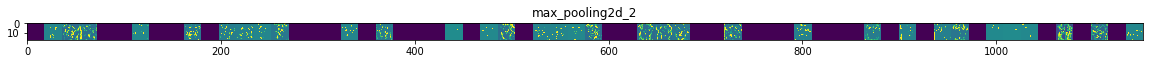

In [49]:
img_path='c:\\data\\cv\\dogs-vs-cats\\test1\\137.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))  
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)                   
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x 

    # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

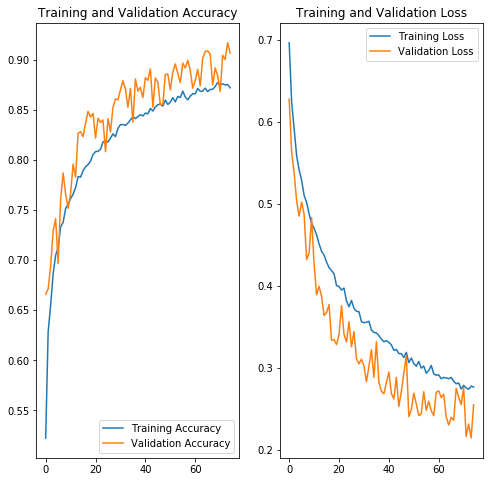

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()